In [2]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

from IPython.display import clear_output

In [3]:
image = cv2.imread('Sudoku.png') # Sudoku
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray') # Source Image (RGB)
plt.show()

In [4]:
# Method: goodFeaturesToTrack
#
# maxCorners
# qualityLevel 
# minDistance between corners


maxCorners:


A Jupyter Widget

qualityLevel:


A Jupyter Widget

minDistance:


A Jupyter Widget

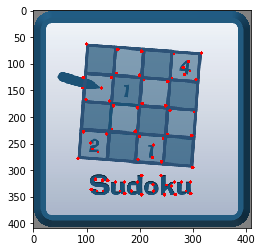

In [6]:
print('maxCorners:')
wMaxCorners = widgets.IntSlider(
    value=40,
    min=2,
    max=100,
    step=2,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wMaxCorners)

print('qualityLevel:')
wQuality = widgets.FloatSlider(
    value=0.01,
    min=0.01,
    max=1,
    step=0.01,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(wQuality)

print('minDistance:')
wMinDistance = widgets.FloatSlider(
    value=10,
    min=0.01,
    max=30,
    step=0.1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(wMinDistance)


img = image.copy() 

def paramsChanged(change):
    clear_output()

    print('maxCorners:')
    display(wMaxCorners)  
    print('qualityLevel:')  
    display(wQuality)
    print('minDistance:')  
    display(wMinDistance)
    
    image = cv2.imread('Sudoku.png') # Sudoku
    img = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    try:
        src = np.float32(gray)
        
        corners = cv2.goodFeaturesToTrack(gray,wMaxCorners.value,wQuality.value,wMinDistance.value)
        corners = np.int0(corners)

        for i in corners:
            x,y = i.ravel()
            cv2.circle(img,(x,y),3,255,-1)

        plt.imshow(img)
        plt.show()
        
    except:
        clear_output()
        print('Invalid parametres. Try again')
        print('maxCorners:')
        display(wMaxCorners)  
        print('qualityLevel:')  
        display(wQuality)
        print('minDistance:')  
        display(wMinDistance)
        

wMaxCorners.observe(paramsChanged, names='value')
wQuality.observe(paramsChanged, names='value')
wMinDistance.observe(paramsChanged, names='value')